In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


## Diff-in-Diff Analysis Of Drug Related Prescriptions in Florida

In [7]:
# loading data for drug prescriptions in Florida and neighbouring states 
prescriptions_reduced =  pd.read_parquet("../20_intermediate_files/prescriptions_wa.parquet")

In [8]:
prescriptions_reduced.columns

Index(['BUYER_STATE', 'BUYER_COUNTY', 'CountyFIPS_x', 'StateFIPS_x', 'Year',
       'MME', 'FIP_unique', 'County', 'State', 'Population', 'county_test',
       'state_abbrev', 'CountyFIPS_y', 'StateFIPS_y', 'CountyName', '_merge'],
      dtype='object')

In [32]:
# # reducing the number of columns in the drug prescriptions dataset by including only the relevant attributes to create a new dataset

# prescriptions_reduced = prescriptions[
#     [
#         "DRUG_CODE",
#         "DRUG_NAME",
#         "QUANTITY",
#         "UNIT",
#         "STRENGTH",
#         "CALC_BASE_WT_IN_GM",
#         "DOSAGE_UNIT",
#         "Product_Name",
#         "Ingredient_Name",
#         "Measure",
#         "MME_Conversion_Factor",
#         "dos_str",
#         "Year",
#         "Month",
#         "StateFIPS",
#         "StateName",
#         "CountyFIPS",
#         "state_abbrev",
#         "FIP_unique",
#         "Population",
#         "county_test",
#     ]
# ]

In [9]:
prescriptions_reduced

,BUYER_STATE,BUYER_COUNTY,CountyFIPS_x,StateFIPS_x,Year,MME,FIP_unique,County,State,Population,county_test,state_abbrev,CountyFIPS_y,StateFIPS_y,CountyName,_merge
index,,,,,,,,,,,,,,,,
3,CO,adams,8001,8,2009.0,110355.414760,80018,Adams County,CO,435700.0,Adams,CO,8001.0,8.0,Adams,both
4,CO,adams,8001,8,2010.0,132304.866282,80018,Adams County,CO,443691.0,Adams,CO,8001.0,8.0,Adams,both
5,CO,adams,8001,8,2011.0,157909.630983,80018,Adams County,CO,452201.0,Adams,CO,8001.0,8.0,Adams,both
6,CO,adams,8001,8,2012.0,161238.256294,80018,Adams County,CO,460558.0,Adams,CO,8001.0,8.0,Adams,both
7,CO,adams,8001,8,2013.0,134536.857641,80018,Adams County,CO,469978.0,Adams,CO,8001.0,8.0,Adams,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,CO,mineral,8079,8,2009.0,0.000000,80798,Mineral County,CO,732.0,Mineral,CO,8079.0,8.0,Mineral,both
7309,CO,mineral,8079,8,2011.0,0.000000,80798,Mineral County,CO,711.0,Mineral,CO,8079.0,8.0,Mineral,both
7310,CO,mineral,8079,8,2012.0,0.000000,80798,Mineral County,CO,719.0,Mineral,CO,8079.0,8.0,Mineral,both


In [11]:
# creating a copy of reduced dataset of prescriptions and converting some of the attributes to appropriate data type

prescriptions_reduced_copy = prescriptions_reduced.copy()

# prescriptions_reduced_copy["Year"] = prescriptions_reduced_copy["Year"].astype("int64")
# prescriptions_reduced_copy["DRUG_CODE"] = prescriptions_reduced_copy["DRUG_CODE"].astype("int64")
# prescriptions_reduced_copy["Month"] = prescriptions_reduced_copy["Month"].astype("int64")
# prescriptions_reduced_copy["Population"] = prescriptions_reduced_copy["Population"].astype("int64")

In [12]:
prescriptions_reduced_copy

,BUYER_STATE,BUYER_COUNTY,CountyFIPS_x,StateFIPS_x,Year,MME,FIP_unique,County,State,Population,county_test,state_abbrev,CountyFIPS_y,StateFIPS_y,CountyName,_merge
index,,,,,,,,,,,,,,,,
3,CO,adams,8001,8,2009.0,110355.414760,80018,Adams County,CO,435700.0,Adams,CO,8001.0,8.0,Adams,both
4,CO,adams,8001,8,2010.0,132304.866282,80018,Adams County,CO,443691.0,Adams,CO,8001.0,8.0,Adams,both
5,CO,adams,8001,8,2011.0,157909.630983,80018,Adams County,CO,452201.0,Adams,CO,8001.0,8.0,Adams,both
6,CO,adams,8001,8,2012.0,161238.256294,80018,Adams County,CO,460558.0,Adams,CO,8001.0,8.0,Adams,both
7,CO,adams,8001,8,2013.0,134536.857641,80018,Adams County,CO,469978.0,Adams,CO,8001.0,8.0,Adams,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,CO,mineral,8079,8,2009.0,0.000000,80798,Mineral County,CO,732.0,Mineral,CO,8079.0,8.0,Mineral,both
7309,CO,mineral,8079,8,2011.0,0.000000,80798,Mineral County,CO,711.0,Mineral,CO,8079.0,8.0,Mineral,both
7310,CO,mineral,8079,8,2012.0,0.000000,80798,Mineral County,CO,719.0,Mineral,CO,8079.0,8.0,Mineral,both


In [14]:
# creating a dataset that has all the drug prescriptions in the state of Florida 

washington_prescriptions = prescriptions_reduced_copy[prescriptions_reduced_copy["State"]=="WA"]
# washington_prescriptions_copy = washington_prescriptions.copy()
washington_prescriptions["shipment_per_100k"] = (
    (
        washington_prescriptions["dos_str"]
        * washington_prescriptions["DOSAGE_UNIT"]
        * washington_prescriptions["MME_Conversion_Factor"]
    )
    / (washington_prescriptions["Population"])
    * 100000
)

washington_prescriptions

KeyError: 'dos_str'

In [37]:
# calculating and displaying total number of drug prescriptions that took place in washington. results are grouped and displayed year and county wise 

washington_prescriptions_result = washington_prescriptions.groupby(["Year", "county_test"])["shipment_per_100k"].sum().reset_index()
# washington_prescriptions_result = washington_prescriptions.groupby(["Year"])["shipment_per_100k"].sum().reset_index()

washington_prescriptions_result.head()
# def scale_years(year):
#     if year == 2007:
#         return -3
#     if year == 2008:
#         return -2
#     if year == 2009:
#         return -1
#     if year == 2010:
#         return 0
#     if year == 2011:
#         return 1
#     if year == 2012:
#         return 2

# washington_prescriptions_result["year relative to policy"] = washington_prescriptions_result["Year"].apply(lambda x: scale_years(x))
# comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

,Year,county_test,shipment_per_100k
0,2009,Asotin,790917.581135
1,2009,Benton,313592.057129
2,2009,Clark,274578.858407
3,2009,Columbia,710334.422932
4,2009,Cowlitz,427756.227601


## Diff-in-Diff Analysis Of Opioid shipments in Washington and Other States 

In [38]:
# creating a new dataset, that contains drug related deaths in other neighboring states of Florida - Alabama, Georgia, Mississippi, South Carolina and Tennessee

other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] != "Washington")]
# other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] == "Alabama")|(prescriptions_reduced_copy["StateName"] == "Georgia")|(prescriptions_reduced_copy["StateName"] == "Mississippi")|(prescriptions_reduced_copy["StateName"] == "South Carolina")|(prescriptions_reduced_copy["StateName"] == "Tennessee")]

other_states_shipment


,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,dos_str,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
1,9193,HYDROCODONE,1.0,NaN,NaN,0.30270,100.0,HYDROCODONE BITARTRATE AND ACETA 5MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,5.0,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
2,9143,OXYCODONE,2.0,NaN,NaN,1.79300,200.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
3,9193,HYDROCODONE,2.0,NaN,NaN,6.05400,1000.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
4,9143,OXYCODONE,1.0,NaN,NaN,2.68950,100.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
5,9193,HYDROCODONE,3.0,NaN,NaN,4.54050,1500.0,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,5.0,2010,6,30,Montana,30013,MT,3001330,81507,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193,HYDROCODONE,1.0,NaN,NaN,1.51350,500.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,5.0,2011,7,30,Montana,30051,MT,3005130,2379,Liberty
30675,9143,OXYCODONE,1.0,NaN,NaN,0.44825,100.0,"OXYCODONE HCL 5MG TABLETS, USP",OXYCODONE HYDROCHLORIDE,TAB,...,5.0,2012,10,30,Montana,30051,MT,3005130,2393,Liberty
30676,9143,OXYCODONE,1.0,NaN,NaN,0.44825,100.0,"OXYCODONE HCL 5MG TABLETS, USP",OXYCODONE HYDROCHLORIDE,TAB,...,5.0,2012,11,30,Montana,30051,MT,3005130,2393,Liberty
30677,9193,HYDROCODONE,1.0,NaN,NaN,1.51350,500.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,5.0,2011,3,30,Montana,30107,MT,3010730,2132,Wheatland


In [39]:
other_states_shipment_copy = other_states_shipment.copy()

# other_states_shipment_copy["shipment_per_100k"] = (other_states_shipment_copy["QUANTITY"] / other_states_shipment_copy["Population"]) * 100_000
other_states_shipment_copy["shipment_per_100k"] = (
    (
        other_states_shipment_copy["dos_str"]
        * other_states_shipment_copy["DOSAGE_UNIT"]
        * other_states_shipment_copy["MME_Conversion_Factor"]
    )
    / (other_states_shipment_copy["Population"])
    * 100000
)

other_states_shipment_copy


,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
1,9193,HYDROCODONE,1.0,NaN,NaN,0.30270,100.0,HYDROCODONE BITARTRATE AND ACETA 5MG,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2010,4,30,Montana,30013,MT,3001330,81507,Cascade,613.444244
2,9143,OXYCODONE,2.0,NaN,NaN,1.79300,200.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,2010,4,30,Montana,30013,MT,3001330,81507,Cascade,3680.665464
3,9193,HYDROCODONE,2.0,NaN,NaN,6.05400,1000.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2010,5,30,Montana,30013,MT,3001330,81507,Cascade,12268.884881
4,9143,OXYCODONE,1.0,NaN,NaN,2.68950,100.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,OXYCODONE HYDROCHLORIDE,TAB,...,2010,5,30,Montana,30013,MT,3001330,81507,Cascade,5520.998196
5,9193,HYDROCODONE,3.0,NaN,NaN,4.54050,1500.0,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2010,6,30,Montana,30013,MT,3001330,81507,Cascade,9201.663661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193,HYDROCODONE,1.0,NaN,NaN,1.51350,500.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2011,7,30,Montana,30051,MT,3005130,2379,Liberty,105086.170660
30675,9143,OXYCODONE,1.0,NaN,NaN,0.44825,100.0,"OXYCODONE HCL 5MG TABLETS, USP",OXYCODONE HYDROCHLORIDE,TAB,...,2012,10,30,Montana,30051,MT,3005130,2393,Liberty,31341.412453
30676,9143,OXYCODONE,1.0,NaN,NaN,0.44825,100.0,"OXYCODONE HCL 5MG TABLETS, USP",OXYCODONE HYDROCHLORIDE,TAB,...,2012,11,30,Montana,30051,MT,3005130,2393,Liberty,31341.412453
30677,9193,HYDROCODONE,1.0,NaN,NaN,1.51350,500.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,2011,3,30,Montana,30107,MT,3010730,2132,Wheatland,117260.787992


In [40]:
# calculating and displaying results for drug related deaths - year, state and county wise 

other_states_result = other_states_shipment_copy.groupby(["Year", "StateName", "county_test"])["shipment_per_100k"].sum().reset_index()
other_states_result.head()


,Year,StateName,county_test,shipment_per_100k
0,2009,Idaho,Ada,1.926903e+05
1,2009,Idaho,Bannock,1.710186e+05
2,2009,Idaho,Bear Lake,1.168108e+06
3,2009,Idaho,Bingham,2.988666e+05
4,2009,Idaho,Blaine,8.337193e+04


In [41]:
washington_summary = pd.DataFrame(washington_prescriptions_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Texas"})
other_states_summary = pd.DataFrame(other_states_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Comp States"})
stats = pd.concat([washington_summary, other_states_summary], axis=1)
stats

,Opioid Shipment per 100k Residents - Texas,Opioid Shipment per 100k Residents - Comp States
count,5.800000e+01,5.400000e+02
mean,4.083192e+05,4.737596e+05
std,2.840329e+05,3.849141e+05
min,4.119906e+03,3.093421e+03
25%,2.668337e+05,2.129883e+05
50%,3.424338e+05,3.875037e+05
75%,5.101877e+05,6.231696e+05
max,1.456675e+06,2.906916e+06


In [42]:
# calculating yearwise drug related deaths results for Oregon
Oregon_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Oregon"].groupby("Year")["shipment_per_100k"].mean()
Oregon_results

Year
2009    4879.444238
2010    4734.872112
2011    5684.182402
2012    5632.306869
Name: shipment_per_100k, dtype: float64

In [43]:
# calculating yearwise drug related deaths results for Idaho
Idaho_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Idaho"].groupby("Year")["shipment_per_100k"].mean()
Idaho_results

Year
2009    15381.455879
2010    14661.252732
2011    12211.419819
2012    12578.564154
Name: shipment_per_100k, dtype: float64

In [44]:
# calculating yearwise drug related deaths results for Montana
montana_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Montana"].groupby("Year")["shipment_per_100k"].mean()
montana_results

Year
2009    17179.924945
2010    17985.627691
2011    18422.209640
2012    21990.337135
Name: shipment_per_100k, dtype: float64

In [45]:
# calculating yearwise drug related deaths results for Nevada
nevada_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Nevada"].groupby("Year")["shipment_per_100k"].mean()
nevada_results

Year
2009     5446.499824
2010    10342.274642
2011     9627.329352
2012     8188.715090
Name: shipment_per_100k, dtype: float64

In [46]:
wa_result = washington_prescriptions_result.groupby("Year")["shipment_per_100k"].mean().reset_index()
comp_result = other_states_result.groupby(["Year"])["shipment_per_100k"].mean().reset_index()
comp_result
wa_result

,Year,shipment_per_100k
0,2009,412890.926425
1,2010,353461.090395
2,2011,418871.698655
3,2012,427675.736219


In [47]:
florida_summary = pd.DataFrame(wa_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Washington"})
comp_summary = pd.DataFrame(comp_result.describe()["shipment_per_100k"]).rename(columns={"shipment_per_100k": "Opioid Shipment per 100k Residents - Control States"})
stats = pd.concat([florida_summary, comp_summary], axis=1)
stats

,Opioid Shipment per 100k Residents - Washington,Opioid Shipment per 100k Residents - Control States
count,4.000000,4.000000
mean,403224.862924,473640.865458
std,33727.014460,12742.824995
min,353461.090395,462033.281586
25%,398033.467418,462927.477404
50%,415881.312540,473517.681719
75%,421072.708046,484231.069773
max,427675.736219,485494.816807


In [48]:
# create a scale for number of years before and after 2012 (target year)

def scale_years(year):
    if year == 2009:
        return -2
    if year == 2010:
        return -1
    if year == 2011:
        return 0
    if year == 2012:
        return 1

wa_result["year relative to policy"] = wa_result["Year"].apply(lambda x: scale_years(x))
comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

# double check no nulls in "year relative to policy"

assert (wa_result["year relative to policy"].isnull().sum() == 0)
assert (comp_result["year relative to policy"].isnull().sum() == 0)

In [49]:
wa_result

,Year,shipment_per_100k,year relative to policy
0,2009,412890.926425,-2
1,2010,353461.090395,-1
2,2011,418871.698655,0
3,2012,427675.736219,1


In [50]:
# split into before 2011 and after 2011

wa_b4 = wa_result[wa_result["Year"] <= 2011]
wa_after = wa_result[wa_result["Year"] >= 2011]


# wa_after = wa_after[wa_after["Year"] != 2011] # may need to handle this differently
from sklearn.linear_model import LinearRegression 

regressor_b4 = LinearRegression() 
regressor_after = LinearRegression()


X_b4 = np.array(wa_b4["year relative to policy"]).reshape(-1, 1)
y_b4 = np.array(wa_b4["shipment_per_100k"]).reshape(-1, 1)

X_after = np.array(wa_after["year relative to policy"]).reshape(-1, 1)
y_after = np.array(wa_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b4.fit(X_b4,y_b4) 
regressor_after.fit(X_after,y_after) 


y_pred_b4 = regressor_b4.predict(X_b4)
y_pred_after = regressor_after.predict(X_after)


In [51]:
comp_b4 = comp_result[comp_result["Year"] <= 2011]
comp_after = comp_result[comp_result["Year"] >= 2011]

# comp_after = comp_after[comp_after["Year"] != 2011] # may need to handle this differently

regressor_b41 = LinearRegression() 
regressor_after1 = LinearRegression()


X_b41 = np.array(comp_b4["year relative to policy"]).reshape(-1, 1)
y_b41 = np.array(comp_b4["shipment_per_100k"]).reshape(-1, 1)

X_after1 = np.array(comp_after["year relative to policy"]).reshape(-1, 1)
y_after1 = np.array(comp_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b41.fit(X_b41,y_b41) 
regressor_after1.fit(X_after1,y_after1) 


y_pred_b41 = regressor_b41.predict(X_b41)
y_pred_after1 = regressor_after1.predict(X_after)

In [52]:
y_pred_after1
# X_after1

array([[483809.82076217],
       [485494.81680742]])

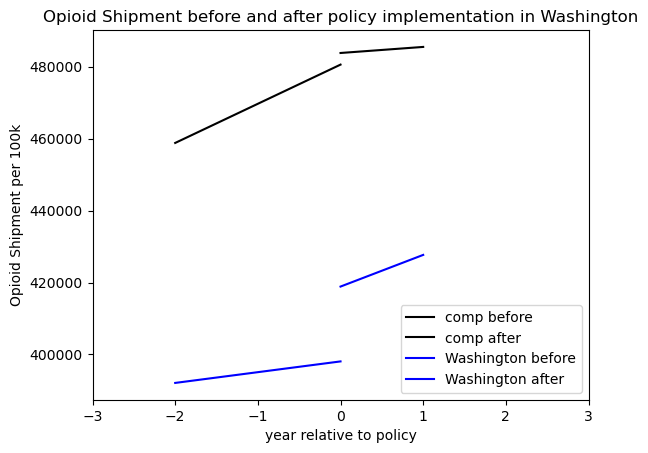

In [53]:
plt.xlim(-3, 3)
#plt.ylim(0, 500)
plt.title("Opioid Shipment before and after policy implementation in Washington")
plt.xlabel("year relative to policy")
plt.ylabel("Opioid Shipment per 100k")
plt.plot(X_b41, y_pred_b41,color='k', label = "comp before")
plt.plot(X_after1, y_pred_after1,color='k', label = "comp after")
plt.plot(X_b4, y_pred_b4,color='b', label = "Washington before")
plt.plot(X_after, y_pred_after,color='b', label = "Washington after")
plt.legend()
plt.show()